In [12]:

# coding: utf-8

# In[1]:

from collections import defaultdict
import pickle
import os
import sys
import networkx as nx
import matplotlib.pyplot as plt
from mixmod_wt.aux import read_raw_network
from louvain_OriginalModAlways import getSeries as alllouvain
from louvain_mixmod_m21_wt_without_global_JL_Final0 import  partition_at_level,getSeries as mixmod
from louvain_OriginalModAlways import _get_commu_dict
# In[3]:


./syntheticNetworkGeneration/netsForDtDmDb/_networks/params/nonweighted/aplha0.3/P0.3/P1_0.3/network_0.3_0.3_0.05_0.3_0.0_10_0.4_0.04_0.04
initial mod =  -0.0457128099174
final mod=  0.368801652893
{1: set([1, 8, 111, 115, 89, 153]), 2: set([197, 198, 199]), 3: set([96, 48, 102, 80, 81, 125]), 4: set([104, 116, 54, 151, 25, 93, 126]), 5: set([33, 92, 175]), 6: set([97, 98, 99])}


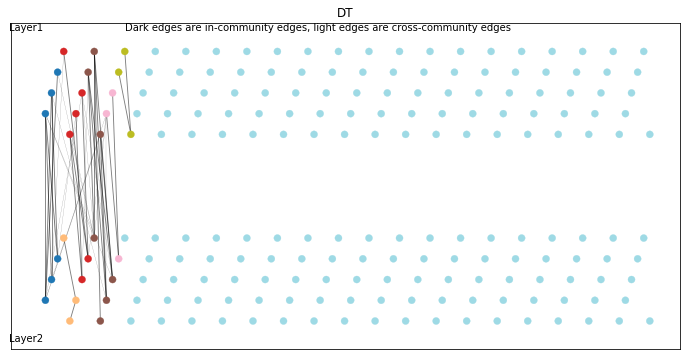

./syntheticNetworkGeneration/netsForDtDmDb/_networks/params/weighted/aplha0.3/P0.3/P1_0.3/network_0.3_0.3_0.05_0.3_0.0_10_3.0_0.3_0.3
initial mod =  -0.040867768595
final mod=  0.452938475666
{1: set([1, 115, 8, 111, 80, 81, 83, 153, 93, 126]), 2: set([2]), 3: set([3, 60]), 4: set([4]), 5: set([5]), 6: set([6]), 7: set([7]), 8: set([9]), 9: set([64, 10, 43]), 10: set([11]), 11: set([12]), 12: set([13]), 13: set([14]), 14: set([15]), 15: set([16]), 16: set([17]), 17: set([18]), 18: set([19]), 19: set([20]), 20: set([21]), 21: set([22]), 22: set([23]), 23: set([24]), 24: set([25, 116, 151]), 25: set([26]), 26: set([27]), 27: set([28]), 28: set([29]), 29: set([77, 30]), 30: set([31]), 31: set([32]), 32: set([33, 171, 92, 175]), 33: set([34]), 34: set([35]), 35: set([36]), 36: set([37]), 37: set([38]), 38: set([97, 98, 39]), 39: set([40, 65]), 40: set([41]), 41: set([42]), 42: set([44]), 43: set([45]), 44: set([46]), 45: set([47]), 46: set([48, 96, 102, 54, 125]), 47: set([49]), 48: set([5

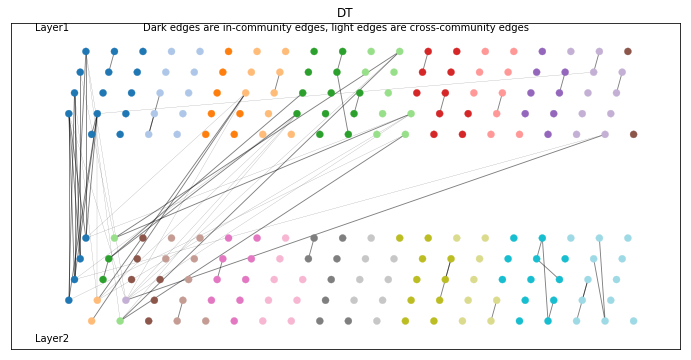

In [17]:

def draw_graph(graph):
    # create networkx graph
    G=nx.Graph()

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    # There are graph layouts like shell, spring, spectral and random.
    # Shell layout usually looks better, so we're choosing it.
    # I will show some examples later of other layouts
    graph_pos = nx.spring_layout(G)

    # draw nodes, edges and labels
    nx.draw_networkx_nodes(G, graph_pos, node_size=10, node_color='blue', alpha=0.3)
    nx.draw_networkx_edges(G, graph_pos, width = 0.1)
    #nx.draw_networkx_labels(G, graph_pos, font_size=12, font_family='sans-serif')

    # show graph
    plt.savefig('sample1.png')
    plt.show()

# draw example
# graph is a list of tuples of nodes. Each tuple defining the
# connection between 2 nodes
#graph = [(20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 20)]


# In[43]:

def getnodepositions(graph):
    n = list(graph.nodes())
    npos = {}
    numnodes = len(n)
    for i in range(1,numnodes//2+1):
        npos[i] = (i, 10+i%5)
    for i in range(numnodes//2+1, numnodes+1):
        j = i-numnodes//2
        npos[i] = (j,1+j%5)
    return npos 

def getnodecolors(graph, commu):
    n = list(graph.nodes())
    colors = []
    for search_node in n:
        for com, nodes in commu.items():
            for node in nodes:
                if node == search_node:
                    colors.append(com)
    return colors

def insamecommunity(e1, e2, commu):
    e1community =-1
    e2community =-2
    for com, nodes in commu.items():
        for node in nodes:
            if node == e1:
                e1community = com
    for com, nodes in commu.items():
        for node in nodes:        
            if node == e2:
                e2community = com
    if(e1community == e2community):
        return 1
    else:
        return 0

def getedgewidths(graph, commu):
    e = list(graph.edges())
    weights = []
    for u,v in e:
        if(insamecommunity(u,v,commu)):
            weights.append(0.9)
        else: 
            weights.append(0.2)
    return weights

def draw_graph_from_nx(graph, commu, plotname=None, title = None):
    #take networkx graph as input, draw graph
    plt.figure(figsize=(12,6))
    
    #get node positions, edge weights node colors
    nodepositions = {x:(x,1) for x in range(len(graph))}
    nodecolors = getnodecolors(graph, commu)
    edgewidths = getedgewidths(graph,commu)
    
    #use spring layout with fixed nodes
    graph_pos = nx.spring_layout(graph, dim = 2, pos = getnodepositions(graph), fixed = range(1,graph.number_of_nodes()+1))
    #graph_pos = nx.drawing.nx_agraph.graphviz_layout(graph)
    
    # draw nodes, edges and labels
    nx.draw_networkx_nodes(graph, graph_pos, node_size=50, node_color=nodecolors, alpha=1, cmap = 'tab20', linewidths = 0.3)
    nx.draw_networkx_edges(graph, graph_pos, width = edgewidths, alpha = 0.5, color = '0.7')
    #nx.draw_networkx_labels(graph, graph_pos, font_size=9, font_family='sans-serif')
    
    #fancy formatting stuff
    plt.xticks([])
    plt.yticks([])
    plt.text(14, 15, "Dark edges are in-community edges, light edges are cross-community edges")
    plt.text(-5, 15,"Layer1")
    plt.text(-5, 0, "Layer2")
    if(title): plt.title(title)
    # show graph
    if(plotname is None): plotname = 'sample1.png'
    #plt.savefig(plotname)
    plt.show()

def readtextnetwork(filename,weighted):
    f = open(filename)
    f.readline()
    nodes1 = [int(x) for x in (f.readline().split())]
    edges = []
    communities = defaultdict(set)
    e1 = int(f.readline())
    for i in range(e1):
        e = [int(x) for x in f.readline().split()]
        if(weighted ==0 | (weighted==1 and e[2]!=0)):
            edges.append((e[0], e[1]))
    nodes2 = [int(x) for x in (f.readline().split())]
    e2 = int(f.readline())
    for i in range(e2):
        e = [int(x) for x in f.readline().split()]
        if(weighted ==0 | (weighted==1 and e[2]!=0)):
            edges.append((e[0], e[1]))
    f.readline()
    f.readline()
    e3 = int(f.readline())
    for i in range(e3):
        e = [int(x) for x in f.readline().split()]
        if(weighted ==0 | (weighted==1 and e[2]!=0)):
            edges.append((e[0], e[1]))
    nodes1.extend(nodes2)
    num_communities = int(f.readline())
    for i in range(num_communities):
        community = [int(x) for x in f.readline().split()]
        communities[i+1] = set(community)
    #print(nodes1, edges, communities)
    newgraph = nx.Graph()
    newgraph.add_nodes_from(nodes1)
    newgraph.add_edges_from(edges)
    return newgraph, communities

'''
#Draw graphs for old networks

olddir = '../../MTP/All_Networks_New/test1/'
oldpathtofile = 'networks_alpha0.6/networks_p0.8/networks_mu0.05/networks_density0.004/'
filename = 'new_format'
oldnetwork, communities = readtextnetwork(olddir+oldpathtofile+filename)
communities, oldnetwork, translation = align_communities(communities, oldnetwork)
draw_graph_from_nx(oldnetwork, communities, 'oldnetwork_a0.6_p0.8_mu0.05_d0.004.png', 'oldnetwork_a0.6_p0.8_mu0.05_d0.004')

'''
def align_communities(commu, ml_network):
    newc = {}
    translation = {}
    numnodes = ml_network.number_of_nodes()
    topptr = 1
    botptr = numnodes//2+1
    for c,v in commu.items():
        com = set()
        for nodes in v:
            if(nodes<=numnodes//2):
                translation[nodes] = topptr
                com.add(topptr)
                topptr+=1
            else:
                translation[nodes] = botptr
                com.add(botptr)
                botptr+=1
        newc[c] = com
    oldnodes = list(ml_network.nodes())
    oldedges = list(ml_network.edges())
    newnodes = []
    newedges = []
    cc = c+1
    com = set()
    for n in oldnodes:
        if n not in translation:
            if(n<=numnodes//2):
                translation[n] = topptr
                com.add(topptr)
                topptr+=1
            else:
                translation[n] = botptr
                com.add(botptr)
                botptr+=1
        newnodes.append(translation[n])
    newc[cc] = com
        
    for e1,e2 in oldedges:
        newedges.append((translation[e1], translation[e2]))
    newnet = nx.Graph()
    newnet.add_nodes_from(newnodes)
    newnet.add_edges_from(newedges)
    #print("newc",newc)
    return newc, newnet, translation



# In[2]:
def main1():
    list_alpha = [0.6]
    mu = 0.05
    list_p = [0.4, 0.6, 0.8]
    p1 = 0.5
    p2 = 0.1

    for a in list_alpha:
        for pval in list_p:
            str1 = '../new_syn_data/n100_net_new/'
            str2 = 'network_'+str(a)+'_'+str(pval)+'_0.05_'+str(p1)+'_'+str(p2)
            m21 = '_commu_benching_frac_march21.pickle'
            modi = '_commu_benching_frac_modi.pickle'
            l21 = '_commu_benching_all_march21_louvain.pickle'
            plotname = 'p_'+str(a)+'_'+str(pval)+'_0.05_'+str(p1)+'_'+str(p2)

            # In[44]: Read ground truth network
            filename = str1+str2
            with open(filename+'_ml_network.pickle', 'rb') as handle:
                    fnetwork = pickle.load(handle)
            ml_network, layer, node_l, node_c, top, bot, couple, edge_l, edge_c, mu, commu = fnetwork


            #Draw network for ground truth communities
            commu, ml_network, translation = align_communities(commu, ml_network)

            '''
            commu is a dict of the form commu[node] = communitynumber. It stores community of each node.
            ml_network is the undirected networkx graph
            translation is the most crucial element here. While aligning communities, nodes have been relabeled.
            translation is a dict which stores this relabeling information - translation[oldlabel] = newlabel
            '''
            draw_graph_from_nx(ml_network, commu, 'imgp/ground-truth-'+plotname+'.png', "GT "+plotname)


            #Draw network for March 21 + GN
            f = open(str1+str2+m21, 'rb')
            p = pickle.load(f)
            gnm21 = {}
            i = 1
            for l in p:
                j = [translation[x] for x in l]
                gnm21[i] = j
                i+=1
            print(gnm21)    
            draw_graph_from_nx(ml_network, gnm21, "imgp/gn-"+plotname+".png", "GN+March21 "+plotname)


            #Plot Louvain + March 21
            f = open(str1+str2+l21, 'rb')
            p = pickle.load(f)
            m = max(p.values())
            louvain_p = defaultdict(list)
            for l in p.keys():
                louvain_p[p[l]].append(translation[l])
            draw_graph_from_nx(ml_network, louvain_p, "imgp/louvain-"+plotname+".png", "Louvain+March21 "+plotname)

def tempplot(filename,netname,weighted,saveas):
    ml_network, layer, node_l, node_c, top, bot, couple, edge_l, edge_c, mu, commu = read_raw_network(filename+netname,weighted)
    commu, ml_network, translation = align_communities(commu, ml_network)

    '''
    commu is a dict of the form commu[node] = communitynumber. It stores community of each node.
    ml_network is the undirected networkx graph
    translation is the most crucial element here. While aligning communities, nodes have been relabeled.
    translation is a dict which stores this relabeling information - translation[oldlabel] = newlabel
    '''
    draw_graph_from_nx(ml_network, commu, saveas+netname+".png", "GT ")

    '''
    #Draw network for March 21 + GN
    f = open(str1+str2+m21, 'rb')
    p = pickle.load(f)
    gnm21 = {}
    i = 1
    for l in p:
        j = [translation[x] for x in l]
        gnm21[i] = j
        i+=1
    print(gnm21)    
    draw_graph_from_nx(ml_network, gnm21, "imgp/gn-"+plotname+".png", "GN+March21 "+plotname)


    #Plot Louvain + March 21
    f = open(str1+str2+l21, 'rb')
    p = pickle.load(f)
    m = max(p.values())
    louvain_p = defaultdict(list)
    for l in p.keys():
        louvain_p[p[l]].append(translation[l])
    draw_graph_from_nx(ml_network, louvain_p, "imgp/louvain-"+plotname+".png", "Louvain+March21 "+plotname)
    '''

def main():
    weighted = 1
    saveas = "./syntheticNetworkGeneration/netsForDtDmDb/tempplots/"
    filename1 = "./syntheticNetworkGeneration/netsForDtDmDb/_networks/params/weighted/aplha0.3/P0.3/P1_0.3/"
    filename2 = "./syntheticNetworkGeneration/netsForDtDmDb/_networks/params/nonweighted/aplha0.3/P0.3/P1_0.3/"
    netname = "network_0.3_0.3_0.05_0.3_0.0_10_3.0_0.3_0.3"
    #tempplot(filename1,netname,weighted,saveas+"weighted_")
    
    weighted =0
    net  = "network_0.3_0.3_0.05_0.3_0.0_10_0.4_0.04_0.04"
    #net = "network_0.3_0.3_0.05_0.3_0.0_10_3.0_0.3_0.3"
    #oldnetwork, communities = readtextnetwork(filename2+net,weighted)
    #print(type(communities),communities)
    #communities, oldnetwork, translation = align_communities(communities, oldnetwork)
    #draw_graph_from_nx(oldnetwork, communities, saveas+"nonweighted_"+net+".png", 'GT')
    
    dtmod, dtcom = alllouvain(filename2+net,weighted)
    dtcom = partition_at_level(dtcom,len(dtcom)-1)
    dtcom  =_get_commu_dict(dtcom)
    print(dtcom)
    oldnetwork, communities = readtextnetwork(filename2+net,weighted)
    communities, oldnetwork, translation = align_communities(dtcom, oldnetwork)
    draw_graph_from_nx(oldnetwork, communities, saveas+"nonweighted_Louvain_detected"+net+".png", 'DT')

    weighted=1
    net = "network_0.3_0.3_0.05_0.3_0.0_10_3.0_0.3_0.3"

    dtmod, dtcom = alllouvain(filename1+net,weighted)
    dtcom = partition_at_level(dtcom,len(dtcom)-1)
    dtcom  =_get_commu_dict(dtcom)
    print(dtcom)
    oldnetwork, communities = readtextnetwork(filename1+net,weighted)
    communities, oldnetwork, translation = align_communities(dtcom, oldnetwork)
    draw_graph_from_nx(oldnetwork, communities, saveas+"weighted_Louvain_detected"+net+".png", 'DT')

    '''
    oldnetwork, communities = readtextnetwork(filename2+net)
    modu,comm = mixmod(filename2+net,weighted)
    comm  =partition_at_level(comm,len(comm)-1)
    comm = _get_commu_dict(comm)
    print(comm)
    communities, oldnetwork, translation = align_communities(comm, oldnetwork)
    draw_graph_from_nx(oldnetwork, communities, saveas+"nonweighted_mixmod_detected"+net+".png", 'DT')
    '''

    #tempplot(filename2,"network_0.3_0.3_0.05_0.3_0.0_10_0.4_0.04_0.04",0,saveas+"nonweighted_")

if __name__ == '__main__':
    main()